In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [40]:
data=pd.read_csv("C://Users//HP//Downloads//delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

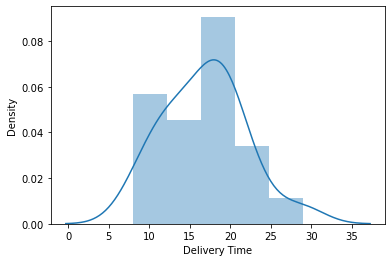

In [42]:
sns.distplot(data['Delivery Time'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

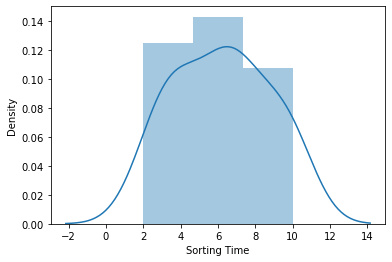

In [43]:
sns.distplot(data['Sorting Time'])

In [44]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

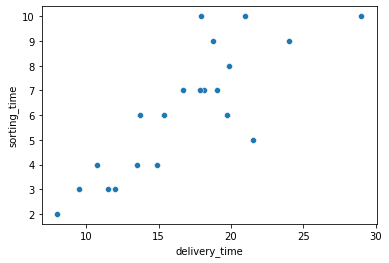

In [45]:
sns.scatterplot(data=data, x="delivery_time", y="sorting_time")

In [46]:
#original model
model=smf.ols('delivery_time~sorting_time',data=data).fit()

In [47]:
print(model.tvalues, '\n', model.pvalues) 

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [48]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [49]:
#Applying sqrt transformation
x_sq = np.sqrt(data['sorting_time']).values.reshape(-1,1)
y_sq = data['delivery_time'].values.reshape(-1,1)

In [50]:
model_sq=smf.ols('y_sq~x_sq',data=data).fit()

In [51]:
print(model_sq.tvalues, '\n', model_sq.pvalues)  

Intercept   -0.840911
x_sq         6.592434
dtype: float64 
 Intercept    0.410857
x_sq         0.000003
dtype: float64


In [52]:
(model_sq.rsquared,model_sq.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

In [53]:
#Applying log transformation
x_log = np.log(data['sorting_time']).values.reshape(-1,1)
y_log = data['delivery_time'].values.reshape(-1,1)

In [54]:
model_log=smf.ols('y_log~x_log',data=data).fit()

In [55]:
print(model_log.tvalues, '\n', model_log.pvalues)  

Intercept    0.472460
x_log        6.586789
dtype: float64 
 Intercept    0.641980
x_log        0.000003
dtype: float64


In [56]:
(model_log.rsquared,model_log.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

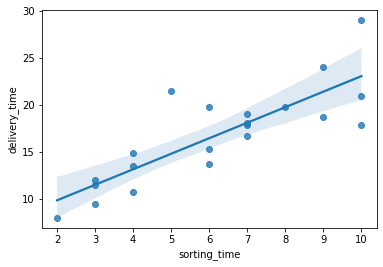

In [57]:
sns.regplot(x="sorting_time",y="delivery_time",data=data)

In [58]:
#Prediction
newdata=pd.Series([4,7])

In [59]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [60]:
model.predict(data_pred)

0    13.178814
1    18.125873
dtype: float64